# Problem 2, Parts C-E: Neural Network

In this Jupyter notebook, we will train a neural network on the MiniBooNE dataset.

Use this notebook to write your code for problem 1 parts C-E by filling in the sections marked `# TODO` and running all cells.

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

data = fetch_openml("miniboone", parser="auto", version=1)
X, y = data["data"].values, (data["target"].values == "True").astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## Part C

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam

# ==============================================
# keras model instance using functional API
# ==============================================

inputs = Input(shape=X_train.shape[1:])

# Three hidden layers 
width = 128
activation = "tanh"
layer1 = Dense(width, activation)(inputs)
layer2 = Dense(width, activation)(layer1)
layer3 = Dense(width, activation)(layer2)

# output layer with sigmoid activation
outputs = Dense(1, activation="sigmoid")(layer3)

# Final complete model
model = Model(inputs=inputs, outputs=outputs)


# Compiling model 
learning_rate = 0.01
model.compile(optimizer=SGD(learning_rate), loss="binary_crossentropy")
model.summary()

# Fitting training data
n_epochs = 50
batch_size = 128
history = model.fit(X_train, y_train,
                    epochs = n_epochs, verbose = 0,
                    batch_size = batch_size,
                    validation_data = (X_test, y_test))

# retrieve predictions
preds_nn = model.predict(X_test)

I0000 00:00:1739741794.739566   78693 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6078 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,681 (155.00 KB)

 Trainable params: 39,681 (155.00 KB)

 Non-trainable params: 0 (0.00 B)

I0000 00:00:1739741795.259806   78866 service.cc:148] XLA service 0x76c8c4005850 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739741795.259830   78866 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2025-02-16 22:36:35.267512: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739741795.298108   78866 cuda_dnn.cc:529] Loaded cuDNN version 90701
E0000 00:00:1739741796.160989   78866 buffer_comparator.cc:157] Difference at 16: 0.0721151, expected 47.4976
E0000 00:00:1739741796.161020   78866 buffer_comparator.cc:157] Difference at 17: 0.163538, expected 45.4575
E0000 00:00:1739741796.161021   78866 buffer_comparator.cc:157] Difference at 18: 0.0527616, expected 48.1789
E0000 00:00:1739741796.161022   78866 buffer_comparator.cc:157] Difference at 19: 0.174015, e

139/813 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step  

E0000 00:00:1739741877.825267   78866 buffer_comparator.cc:157] Difference at 16: 0.814048, expected 51.2153
E0000 00:00:1739741877.825288   78866 buffer_comparator.cc:157] Difference at 17: 0.035254, expected 47.4873
E0000 00:00:1739741877.825290   78866 buffer_comparator.cc:157] Difference at 18: 1.99817, expected 52.5778
E0000 00:00:1739741877.825292   78866 buffer_comparator.cc:157] Difference at 19: 867.206, expected 49.4189
E0000 00:00:1739741877.825293   78866 buffer_comparator.cc:157] Difference at 20: 0.317181, expected 46.4285
E0000 00:00:1739741877.825294   78866 buffer_comparator.cc:157] Difference at 21: 59.7027, expected 47.8198
E0000 00:00:1739741877.825295   78866 buffer_comparator.cc:157] Difference at 22: 0.247934, expected 48.2854
E0000 00:00:1739741877.825296   78866 buffer_comparator.cc:157] Difference at 23: -0.0416616, expected 48.1324
E0000 00:00:1739741877.825297   78866 buffer_comparator.cc:157] Difference at 24: 0.594571, expected 48.7427
E0000 00:00:17397418

813/813 ━━━━━━━━━━━━━━━━━━━━ 1s 863us/step


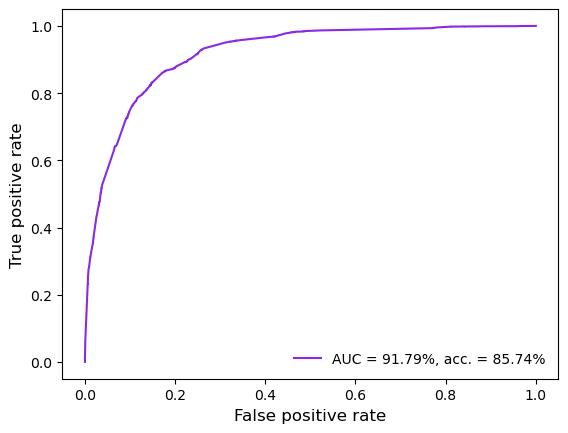

In [4]:
from roc_helper import plot_roc

fig = plot_roc(y_test, preds_nn)

An AUC of 91.79% ad an accuracy of 85.74% was obtained "out of the box". Comparining to the BDT (AUC 98.86%, accuracy 94.60%), we have a considerable decrease in both AUC and accuracy.

## Part D

In [ ]:
# ==============================================
# keras model instance using functional API
# ==============================================

inputs = Input(shape=X_train.shape[1:])

# Three hidden layers with relu activation
width = 128
activation = "relu"
layer1 = Dense(width, activation)(inputs)
layer2 = Dense(width, activation)(layer1)
layer3 = Dense(width, activation)(layer2)

# output layer with sigmoid activation
outputs = Dense(1, activation="sigmoid")(layer3)

# Final complete model
model = Model(inputs=inputs, outputs=outputs)


# Compiling model 
learning_rate = 0.01
model.compile(optimizer=SGD(learning_rate), loss="binary_crossentropy")
model.summary()

# Fitting training data
n_epochs = 50
batch_size = 128
history = model.fit(X_train, y_train,
                    epochs = n_epochs, verbose = 0,
                    batch_size = batch_size,
                    validation_data = (X_test, y_test))

# retrieve predictions
preds_nn = model.predict(X_test)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,681 (155.00 KB)

 Trainable params: 39,681 (155.00 KB)

 Non-trainable params: 0 (0.00 B)

2025-02-16 22:39:22.565043: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_276', 12 bytes spill stores, 12 bytes spill loads

E0000 00:00:1739741962.726091   78866 buffer_comparator.cc:157] Difference at 16: 0.0336598, expected 56.9613
E0000 00:00:1739741962.726116   78866 buffer_comparator.cc:157] Difference at 17: 0.281032, expected 54.7425
E0000 00:00:1739741962.726118   78866 buffer_comparator.cc:157] Difference at 18: 0.126223, expected 59.1979
E0000 00:00:1739741962.726119   78866 buffer_comparator.cc:157] Difference at 19: 0.0179162, expected 56.3757
E0000 00:00:1739741962.726120   78866 buffer_comparator.cc:157] Difference at 20: 0.279418, expected 54.1206
E0000 00:00:1739741962.726121   78866 buffer_comparator.cc:157] Difference at 21: 0.110081, expected 52.8447
E0000 00:00:1739741962.726122   78866 buffer_comparator.cc:157] Difference at 22: 0.0578135, expected 58.1966


  1/813 ━━━━━━━━━━━━━━━━━━━━ 6:27 477ms/step

E0000 00:00:1739742064.383604   78865 buffer_comparator.cc:157] Difference at 16: nan, expected 75.004
E0000 00:00:1739742064.383626   78865 buffer_comparator.cc:157] Difference at 17: nan, expected 69.3548
E0000 00:00:1739742064.383628   78865 buffer_comparator.cc:157] Difference at 18: nan, expected 77.2733
E0000 00:00:1739742064.383629   78865 buffer_comparator.cc:157] Difference at 19: nan, expected 71.6153
E0000 00:00:1739742064.383631   78865 buffer_comparator.cc:157] Difference at 20: nan, expected 67.9822
E0000 00:00:1739742064.383632   78865 buffer_comparator.cc:157] Difference at 21: nan, expected 69.9421
E0000 00:00:1739742064.383632   78865 buffer_comparator.cc:157] Difference at 22: nan, expected 70.2656
E0000 00:00:1739742064.383634   78865 buffer_comparator.cc:157] Difference at 23: nan, expected 70.0041
E0000 00:00:1739742064.383635   78865 buffer_comparator.cc:157] Difference at 24: nan, expected 70.1267
E0000 00:00:1739742064.383635   78865 buffer_comparator.cc:157] D

813/813 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step


In [6]:
preds_nn

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

We see that with using ReLu, the network was not able to train effectively. This is likely due to the fact that the range of expected values of the output include negative numbers. To still use ReLu, we should adjust/scale the X values to be positive values. 

## Part E

In [ ]:
from sklearn.preprocessing import StandardScaler

# Implementing scaling on the 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==============================================
# TODO: Implement the Keras model instance
# as described in part E
# ==============================================
inputs = Input(shape=X_train.shape[1:])

# Three hidden layers 
width = 128
activation = "relu"
layer1 = Dense(width, activation)(inputs)
layer2 = Dense(width, activation)(layer1)
layer3 = Dense(width, activation)(layer2)

# output layer with sigmoid activation
outputs = Dense(1, activation="sigmoid")(layer3)

# Final complete model
model = Model(inputs=inputs, outputs=outputs)


# Compiling model 
learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate), loss="binary_crossentropy")
model.summary()

# Fitting training data
n_epochs = 50
batch_size = 128
history = model.fit(X_train, y_train,
                    epochs = n_epochs, verbose = 0,
                    batch_size = batch_size,
                    validation_data = (X_test, y_test))

# retrieve predictions
preds_nn = model.predict(X_test)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,681 (155.00 KB)

 Trainable params: 39,681 (155.00 KB)

 Non-trainable params: 0 (0.00 B)

E0000 00:00:1739742083.880409   78859 buffer_comparator.cc:157] Difference at 16: -nan, expected 70.4372
E0000 00:00:1739742083.880432   78859 buffer_comparator.cc:157] Difference at 17: -nan, expected 67.6935
E0000 00:00:1739742083.880433   78859 buffer_comparator.cc:157] Difference at 18: -nan, expected 73.2031
E0000 00:00:1739742083.880434   78859 buffer_comparator.cc:157] Difference at 19: -nan, expected 69.7131
E0000 00:00:1739742083.880435   78859 buffer_comparator.cc:157] Difference at 20: -nan, expected 66.9246
E0000 00:00:1739742083.880436   78859 buffer_comparator.cc:157] Difference at 21: -nan, expected 65.3467
E0000 00:00:1739742083.880437   78859 buffer_comparator.cc:157] Difference at 22: -nan, expected 71.9648
E0000 00:00:1739742083.880438   78859 buffer_comparator.cc:157] Difference at 23: -nan, expected 66.4421
E0000 00:00:1739742083.880439   78859 buffer_comparator.cc:157] Difference at 24: -nan, expected 75.3409
E0000 00:00:1739742083.880440   78859 buffer_comparator

813/813 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step


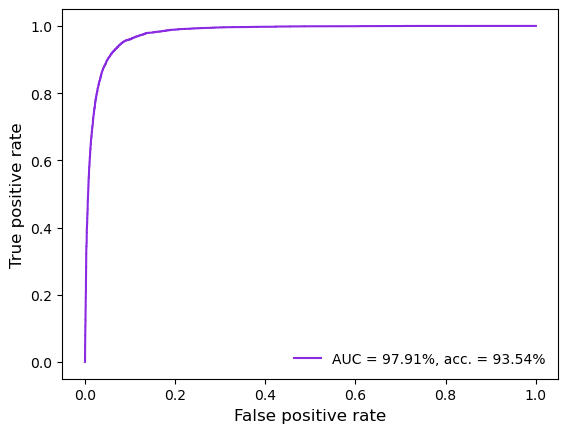

In [8]:
fig = plot_roc(y_test, preds_nn)

We see that the both the AUC and accuracy were greatly improved and comparable, albeit less than the values obtained by the BDT: (97.91%, 93.54%) for the NN vs (98.86%, 94.60%) for the BDT. This is as BDT are very effective at categorization of tabular data. 